In [ ]:
!pip install mord
from google.colab import drive
drive.mount('/content/drive')
import numpy as np    # matrices and stuff
import sklearn        # clustering models, classification models, preprocessing, ...
import matplotlib     # plot
import pandas as pd   # table manipulation
from typing import List
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading the Football Record Data

In [ ]:
data_table = pd.read_csv('/content/drive/MyDrive/Data/CFBeattendance.csv', encoding='latin1')

In [ ]:
data_table.columns

Index(['Date', 'Team', 'Time', 'Opponent', 'Rank', 'Site', 'TV', 'Result',
       'Attendance', 'Current Wins', 'Current Losses', 'Stadium Capacity',
       'Fill Rate', 'New Coach', 'Tailgating', 'PRCP', 'SNOW', 'SNWD', 'TMAX',
       'TMIN', 'Opponent_Rank', 'Conference', 'Year', 'Month', 'Day'],
      dtype='object')

In [ ]:
data_table.head()

,Date,Team,Time,Opponent,Rank,Site,TV,Result,Attendance,Current Wins,...,PRCP,SNOW,SNWD,TMAX,TMIN,Opponent_Rank,Conference,Year,Month,Day
0,9/2/2000,Arkansas,8:00 PM,Southwest Missouri State*,NR,"War Memorial StadiumLittle Rock, AR",Not on TV,W 380,53946,0,...,0.00,0.0,0.0,105,65,NR,SEC,2000,9,2
1,9/16/2000,Arkansas,6:00 PM,Boise State*,NR,"War Memorial StadiumLittle Rock, AR",Not on TV,W 3831,54286,1,...,0.00,0.0,0.0,79,44,NR,SEC,2000,9,16
2,9/23/2000,Arkansas,8:00 PM,Alabama,NR,"Razorback StadiumFayetteville, AR",ESPN2,W 2821,51482,2,...,2.12,0.0,0.0,85,63,NR,SEC,2000,9,23
3,9/30/2000,Arkansas,11:30 AM,No. 25 Georgia,NR,"Razorback StadiumFayetteville, AR",JPS,L 738,51162,3,...,0.00,0.0,0.0,77,45,25,SEC,2000,9,30
4,10/7/2000,Arkansas,6:00 PM,LouisianaMonroe*,NR,"Razorback StadiumFayetteville, AR",Not on TV,W 526,50947,3,...,0.00,0.0,0.0,50,28,NR,SEC,2000,10,7


Preprocess Data

In [ ]:
def remove_no_rank(dataset: pd.DataFrame, column_name: str, value_to_remove: str):
    mask = dataset[column_name] == value_to_remove
    dataset.drop(dataset[mask].index, inplace=True)

remove_no_rank(data_table, "Rank", "NR")

data_table.head()


,Date,Team,Time,Opponent,Rank,Site,TV,Result,Attendance,Current Wins,...,PRCP,SNOW,SNWD,TMAX,TMIN,Opponent_Rank,Conference,Year,Month,Day
22,9/20/2003,Arkansas,6:00 PM,North Texas*,14,"War Memorial StadiumLittle Rock, AR",Not on TV,W 317,55825,2,...,0.00,0.0,0.0,76,42,NR,SEC,2003,9,20
23,10/11/2003,Arkansas,11:30 AM,Auburn,7,Donald W. Reynolds Razorback StadiumFayettevil...,JPS,L 310,74026,4,...,0.01,0.0,0.0,76,53,NR,SEC,2003,10,11
24,10/18/2003,Arkansas,2:30 PM,Florida,11,Donald W. Reynolds Razorback StadiumFayettevil...,CBS,L 2833,73934,4,...,0.00,0.0,0.0,72,37,NR,SEC,2003,10,18
43,10/14/2006,Arkansas,1:00 PM,SE Missouri State*,17,Donald W. Reynolds Razorback StadiumFayettevil...,Not on TV,W 637,72453,4,...,0.00,0.0,0.0,69,37,NR,SEC,2006,10,14
44,10/21/2006,Arkansas,11:30 AM,Ole Miss,15,Donald W. Reynolds Razorback StadiumFayettevil...,LFS,W 383,73445,5,...,0.00,0.0,0.0,66,40,NR,SEC,2006,10,21


Grabbing Desired Features

In [ ]:
desired_features: List[str] = ["Rank", "Fill Rate"]
new_data_table = data_table[desired_features]

new_data_table.head()

,Rank,Fill Rate
22,14,1.039049
23,7,1.028139
24,11,1.026861
43,17,1.006292
44,15,1.020069


Defining feature (x) and target variable (y), split data into training sets, creating the model, train linear regression model, make predictions, and evaluate model



In [ ]:
print(new_data_table.dtypes)

Rank          object
Fill Rate    float64
dtype: object


In [ ]:
copy_of_new_data_table = new_data_table.copy()

copy_of_new_data_table['Rank'] = pd.to_numeric(copy_of_new_data_table['Rank'])

X = copy_of_new_data_table[['Rank']]
y = copy_of_new_data_table['Fill Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

y_pred_regression = regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_regression)
r2 = r2_score(y_test, y_pred_regression)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.012881696850237458
R^2 Score: 0.05523760577470649


In [ ]:
copy_of_new_data_table.head()

,Rank,Fill Rate
22,14,1.039049
23,7,1.028139
24,11,1.026861
43,17,1.006292
44,15,1.020069


Using Win Percentage as Feature Instead

In [ ]:
desired_features: List[str] = ["Fill Rate", "Current Wins", "Current Losses"]
new_data_table_2 = data_table[desired_features]

new_data_table_2.head()

,Fill Rate,Current Wins,Current Losses
22,1.039049,2,0
23,1.028139,4,0
24,1.026861,4,1
43,1.006292,4,1
44,1.020069,5,1


Creating Win Percentage Column

In [ ]:
copy_of_new_data_table_2 = new_data_table_2.copy()
copy_of_new_data_table_2 = copy_of_new_data_table_2[(copy_of_new_data_table_2['Current Wins'] != 0) | (copy_of_new_data_table_2['Current Losses'] != 0)] # filters out teaams that have no record

copy_of_new_data_table_2.loc[:, "Win Percentage"] = copy_of_new_data_table_2['Current Wins'] / (copy_of_new_data_table_2['Current Wins'] + copy_of_new_data_table_2['Current Losses']) * 100.0

copy_of_new_data_table_2.head()

,Fill Rate,Current Wins,Current Losses,Win Percentage
22,1.039049,2,0,100.000000
23,1.028139,4,0,100.000000
24,1.026861,4,1,80.000000
43,1.006292,4,1,80.000000
44,1.020069,5,1,83.333333


In [ ]:
copy_of_new_data_table_2['Win Percentage'] = copy_of_new_data_table_2['Win Percentage'].astype(float)
X = copy_of_new_data_table_2[['Win Percentage']]
y = copy_of_new_data_table_2['Fill Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

y_pred_regression = regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_regression)
r2 = r2_score(y_test, y_pred_regression)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.01336788622081802
R^2 Score: -0.005815588744676026


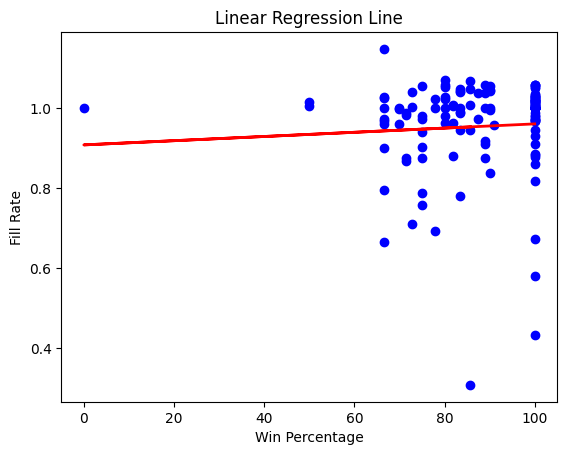

In [ ]:
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

plt.plot(X_test, y_pred_regression, color='red', linewidth=2, label='Linear Regression Line')

plt.xlabel('Win Percentage')
plt.ylabel('Fill Rate')
plt.title('Linear Regression Line')

plt.show()